In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
%config InlineBackend.figure_format='retina'

### Exercise 02: Non uniform sampling and random walks

The first goal of the exercise is to compute an integral sampling a suitable distribution (depending on the integrand). The second part regards an analysis on random walks on cubis lattice and in free space.

### Exercise 02.1
- The following 1D integral via Monte Carlo is computed
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)
The results are as usual analysed trhough the emthod of data blocking.

Here the sampled PDF for the second point is $p(x)=2(1-x)$. It roughly follows the shape of the integrad, reason why it has been used for importance sampling
Total number of throws $M = 10^6$

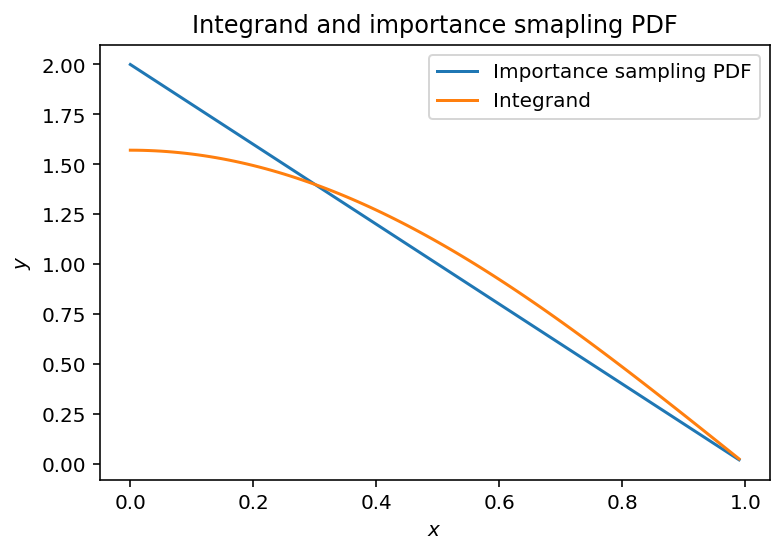

In [2]:
x = np.arange(0,1,0.01)
y = 2*(1-x)
z = np.pi/2*np.cos(np.pi*x/2)
plt.plot(x,y, label = "Importance sampling PDF")
plt.plot(x, z, label = "Integrand")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Integrand and importance smapling PDF")
plt.legend()
plt.show()

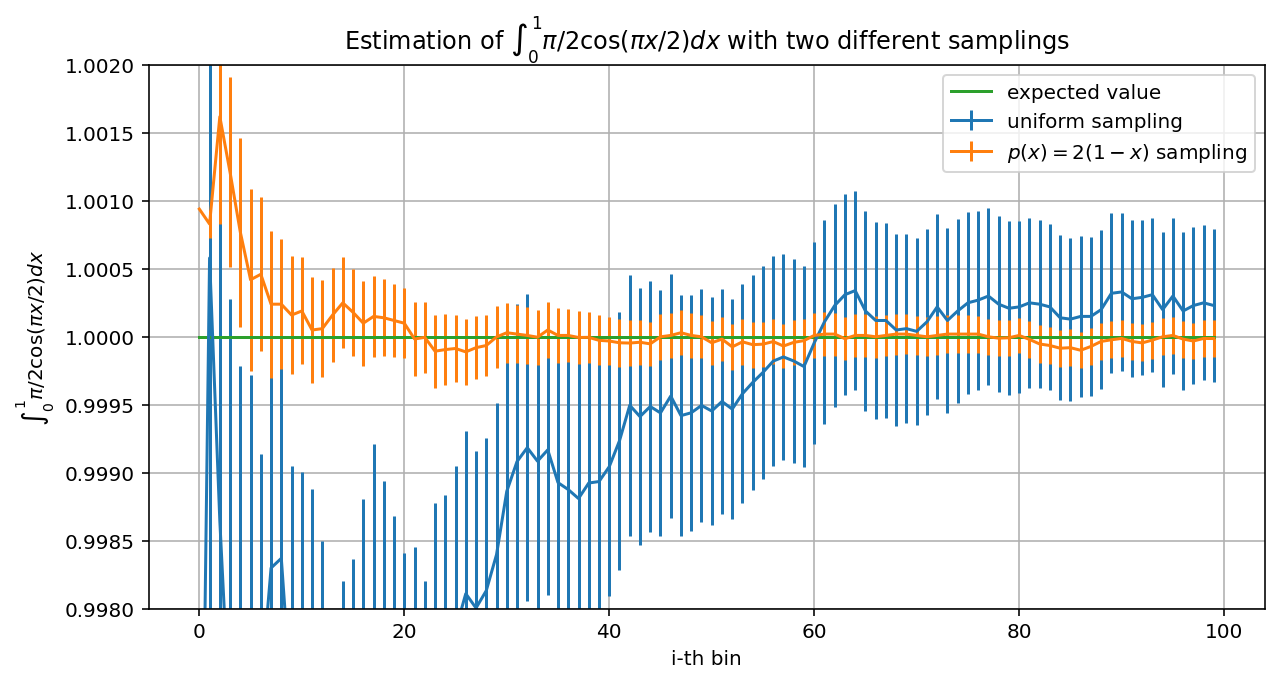

In [3]:
x, f, error, exp = np.loadtxt("uniform_integral.txt", usecols=(0,1,2,3), unpack='true')

x1, f1, error1 = np.loadtxt("linear_sampling_integral.txt", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(10, 5))
plt.errorbar(x,f,yerr=error, label = "uniform sampling")
plt.errorbar(x1,f1,yerr=error1, label = "$p(x) = 2(1-x)$ sampling")
plt.plot(x,exp,label="expected value")
plt.ylim([0.998, 1.002])
plt.xlabel('i-th bin')
plt.ylabel('$\int_0^1{\pi}/{2}\cos(\pi x/2) dx$')
plt.grid(True)
plt.title("Estimation of $\int_{0}^{1}{{\pi}/{2}\cos(\pi x/2) dx}$ with two different samplings")
plt.legend()
plt.show()

As it can be seen from the (zoomed in) graph the importance sampling converges faster to the correct result and show significantly smaller error.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> The simulation of a random walk in 3D is repeated $10^4$ times, always starting at the origin in two different codintions:

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

For both RWs a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ is shown with their statistical uncertainties as function of the step $i\in [0,10^2]$. The procedure followed consists in taking an ensemble average on $10^4$ realizations of (both kinds of) RWs of the value at "time" $i$. The plotted values are the final pair of error and mean realized throught data blocking (on the ensemble) with $100$ blocks. 

The last step of the exercise is to try and confront the evolution of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ in the RWs with the one of a diffusive process, described by $\sqrt{\langle |\vec{r}_N|^2 \rangle_{diff}} = k\sqrt{N}$

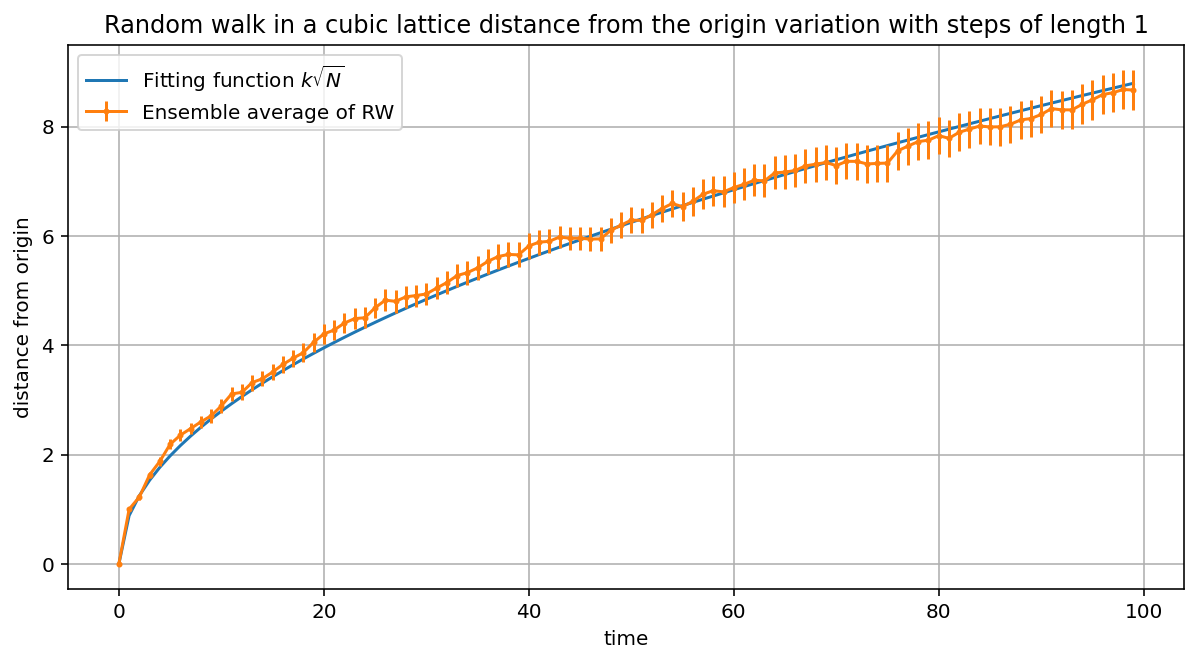

Value of fitting parameter k = 0.8836 ± 0.0021


In [4]:
x, f, err = np.loadtxt("RW_cubic_lattice.txt", usecols=(0,1,2), unpack='true')
plt.figure(figsize=(10, 5))
def f1(x,a):  # defining the fitting function
    return a * np.sqrt(x)
p_opt, p_cov = curve_fit(f1, x, f)
y_fit = f1(x, p_opt[0])
plt.plot(x,y_fit, label = "Fitting function $k\sqrt{N}$") # plotting fitting function
plt.errorbar(x,f, yerr = err, marker = "o", markersize=2, label = "Ensemble average of RW")
plt.xlabel('time')
plt.ylabel('distance from origin')
plt.grid(True)
plt.title("Random walk in a cubic lattice distance from the origin variation with steps of length 1")
plt.legend()
plt.show()
print("Value of fitting parameter k = "'{0:.4f}'.format(p_opt[0]), u"\u00B1", '{0:.4f}'.format(np.sqrt(np.diagonal(p_cov))[0]))

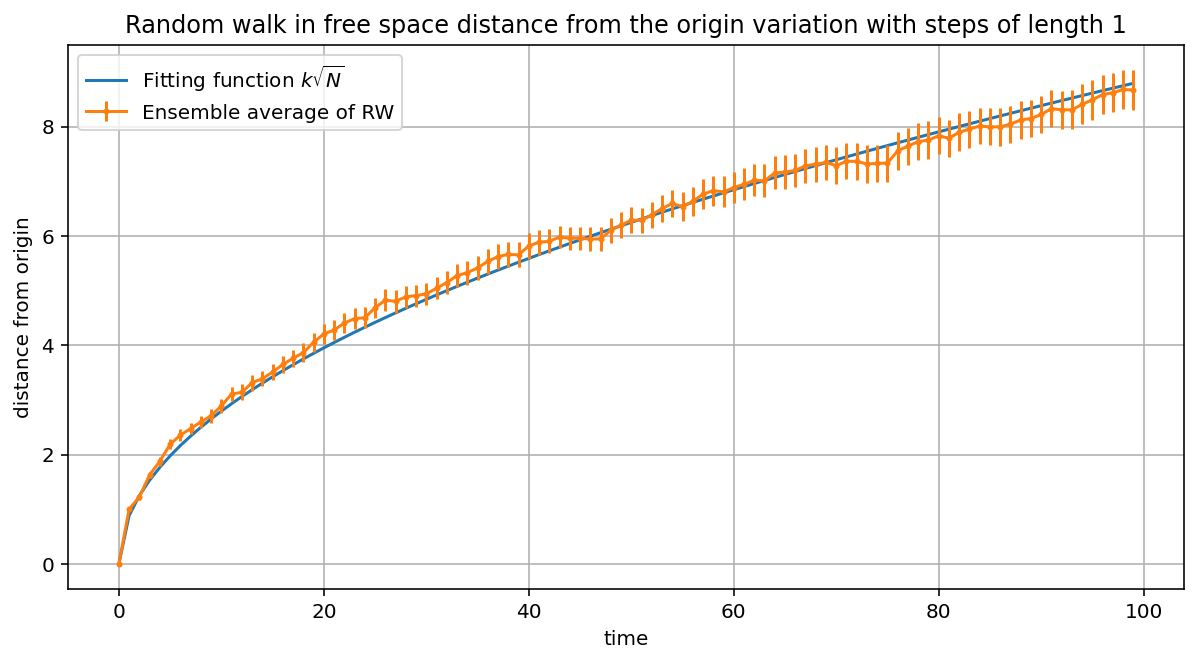

Value of fitting parameter k = 0.8836 ± 0.0021


In [5]:
x, f, err = np.loadtxt("RW_free_space.txt", usecols=(0,1,2), unpack='true')
def f1(x,a):  # defining the fitting function
    return a * np.sqrt(x)
p_opt, p_cov = curve_fit(f1, x, f)
y_fit = f1(x, p_opt[0])
plt.figure(figsize=(10, 5))
plt.plot(x,y_fit, label = "Fitting function $k\sqrt{N}$") # plotting fitting function
plt.errorbar(x,f, yerr = err, marker = "o", markersize=2, label = "Ensemble average of RW")
plt.xlabel('time')
plt.ylabel('distance from origin')
plt.grid(True)
plt.title("Random walk in free space distance from the origin variation with steps of length 1")
plt.legend()
plt.show()
print("Value of fitting parameter k = "'{0:.4f}'.format(p_opt[0]), u"\u00B1", '{0:.4f}'.format(np.sqrt(np.diagonal(p_cov))[0]))

For both kinds of Random Walks the expected diffusive behaviour is met